In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
import requests
import json
from api_key import data_gov_key
import sys

# Study data files
presidential_votes_path = "1976-2016-president.csv"

# Read the presidential votes csv
presidential_votes_data = pd.read_csv(presidential_votes_path)

## Part III: A Look At Rounded Net Receipts By State

Nicholas Prentkowski

Is there a discrepancy between states when it comes to the amount of money contributed by inviduals and formal instituions to presidential candidates? I followed the money spent by Democractic and Repubican candidate's advocates to answer this question. Additionally, I took it a step further by creating two specific bar plots with a honed focus. The first sheds light on the question everyone is asking themselves: "Which states did Donald Trump's contributions come from and how much came from each state individually to help fund his campaign to victory during the 2016 general election?" Moreover, I answered the same question about contributions made to Hillary Clinton during her historic attempt to realize the coveted priviledge to call 1600 Pennsylvania Avenue home. 

In [2]:
# Create a data frame out of the data from the csv 
presidential_votes_df = pd.DataFrame(presidential_votes_data)

In [3]:
# Show new data frame
presidential_votes_df

,year,state,state_po,state_fips,state_cen,state_ic,office,candidate,party,writein,candidatevotes,totalvotes,version,notes
0,1976,Alabama,AL,1,63,41,US President,"Carter, Jimmy",democrat,False,659170,1182850,20171015,NaN
1,1976,Alabama,AL,1,63,41,US President,"Ford, Gerald",republican,False,504070,1182850,20171015,NaN
2,1976,Alabama,AL,1,63,41,US President,"Maddox, Lester",american independent party,False,9198,1182850,20171015,NaN
3,1976,Alabama,AL,1,63,41,US President,"Bubar, Benjamin """"Ben""""",prohibition,False,6669,1182850,20171015,NaN
4,1976,Alabama,AL,1,63,41,US President,"Hall, Gus",communist party use,False,1954,1182850,20171015,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3735,2016,Wyoming,WY,56,83,68,US President,NaN,NaN,True,6904,258788,20171015,NaN
3736,2016,Wyoming,WY,56,83,68,US President,NaN,independent,False,3224,258788,20171015,NaN
3737,2016,Wyoming,WY,56,83,68,US President,Blank Vote,NaN,False,2661,258788,20171015,NaN
3738,2016,Wyoming,WY,56,83,68,US President,"Castle, Darrell L.",constitution party,False,2042,258788,20171015,NaN


In [4]:
# Drop unnecessary columns
presidential_votes_df= presidential_votes_df.drop(['state_fips', 'state_cen', 'state_ic',
                 'office', 'party', 'writein', 'totalvotes',
                 'version', 'notes'], axis=1)

In [5]:
# Show clean df
presidential_votes_df.head()

,year,state,state_po,candidate,candidatevotes
0,1976,Alabama,AL,"Carter, Jimmy",659170
1,1976,Alabama,AL,"Ford, Gerald",504070
2,1976,Alabama,AL,"Maddox, Lester",9198
3,1976,Alabama,AL,"Bubar, Benjamin """"Ben""""",6669
4,1976,Alabama,AL,"Hall, Gus",1954


In [6]:
# Rename stat_po column to match your other df
presidential_votes_df.rename(columns = {'state_po':'contributor_state'}, inplace = True)

In [7]:
# Shpw df
presidential_votes_df

,year,state,contributor_state,candidate,candidatevotes
0,1976,Alabama,AL,"Carter, Jimmy",659170
1,1976,Alabama,AL,"Ford, Gerald",504070
2,1976,Alabama,AL,"Maddox, Lester",9198
3,1976,Alabama,AL,"Bubar, Benjamin """"Ben""""",6669
4,1976,Alabama,AL,"Hall, Gus",1954
...,...,...,...,...,...
3735,2016,Wyoming,WY,NaN,6904
3736,2016,Wyoming,WY,NaN,3224
3737,2016,Wyoming,WY,Blank Vote,2661
3738,2016,Wyoming,WY,"Castle, Darrell L.",2042


In [8]:
# Find only the data pertaining to 2016
presidential_votes_df = presidential_votes_df.loc[presidential_votes_df['year'] == 2016]

In [9]:
# Show df
presidential_votes_df.head()

,year,state,contributor_state,candidate,candidatevotes
3395,2016,Alabama,AL,"Trump, Donald J.",1318255
3396,2016,Alabama,AL,"Clinton, Hillary",729547
3397,2016,Alabama,AL,"Johnson, Gary",44467
3398,2016,Alabama,AL,NaN,21712
3399,2016,Alabama,AL,"Stein, Jill",9391


In [11]:
# Testing getting values from the FEC api
cand_url = 'https://api.open.fec.gov/v1/presidential/contributions/by_candidate/'

# Set the amount of data to be returned per page. Must be under 100
per_page = 50

# Establish params
params = {"api_key" : data_gov_key,
         "election_year" : "2016",
         "per_page" : per_page}

# First json request to get the number of pages to loop through
cand_search = requests.get(cand_url, params=params)

# Json'ing it up
cand_search = cand_search.json()

# Stores the number of pages the search returns
page_nums = cand_search['pagination']['pages']

# Print api call
print(json.dumps(cand_search, indent=4))


{
    "api_version": "1.0",
    "pagination": {
        "pages": 34,
        "per_page": 50,
        "count": 1669,
        "page": 1
    },
    "results": [
        {
            "candidate_last_name": "All candidates",
            "rounded_net_receipts": 1462.3,
            "contributor_state": "US",
            "election_year": 2016,
            "candidate_id": "P00000001",
            "candidate_party_affiliation": null,
            "net_receipts": 1462314770.13
        },
        {
            "candidate_last_name": "Democrats",
            "rounded_net_receipts": 799.4,
            "contributor_state": "US",
            "election_year": 2016,
            "candidate_id": "P00000002",
            "candidate_party_affiliation": "DEM",
            "net_receipts": 799419661.15
        },
        {
            "candidate_last_name": "Republicans",
            "rounded_net_receipts": 639.1,
            "contributor_state": "US",
            "election_year": 2016,
            "candidate_

In [12]:
# Creating lists to store the data to pass to a dataframe
id_list = []
net_rec_list = []
contr_state_list = []
can_last_name = []
can_party = []

# Commence for loop
for page in range(1, page_nums):
    params['page'] = page
    cand_data = requests.get(cand_url, params=params)
    cand_data = cand_data.json()
    
# Print(json.dumps(cand_data, indent=4))
    for result in range(0, per_page):
        try:
            id_list.append(cand_data['results'][result]['candidate_id'])
            net_rec_list.append(cand_data['results'][result]['rounded_net_receipts'])
            contr_state_list.append(cand_data['results'][result]['contributor_state'])
            can_last_name.append(cand_data['results'][result]['candidate_last_name'])
            can_party.append(cand_data['results'][result]['candidate_party_affiliation'])
            print("Data appended")
        except:
            print("Data out of range/not found...")
   

Data appended
Data appended
Data appended
Data appended
Data appended
Data appended
Data appended
Data appended
Data appended
Data appended
Data appended
Data appended
Data appended
Data appended
Data appended
Data appended
Data appended
Data appended
Data appended
Data appended
Data appended
Data appended
Data appended
Data appended
Data appended
Data appended
Data appended
Data appended
Data appended
Data appended
Data appended
Data appended
Data appended
Data appended
Data appended
Data appended
Data appended
Data appended
Data appended
Data appended
Data appended
Data appended
Data appended
Data appended
Data appended
Data appended
Data appended
Data appended
Data appended
Data appended
Data appended
Data appended
Data appended
Data appended
Data appended
Data appended
Data appended
Data appended
Data appended
Data appended
Data appended
Data appended
Data appended
Data appended
Data appended
Data appended
Data appended
Data appended
Data appended
Data appended
Data appended
Data a

Data appended
Data appended
Data appended
Data appended
Data appended
Data appended
Data appended
Data appended
Data appended
Data appended
Data appended
Data appended
Data appended
Data appended
Data appended
Data appended
Data appended
Data appended
Data appended
Data appended
Data appended
Data appended
Data appended
Data appended
Data appended
Data appended
Data appended
Data appended
Data appended
Data appended
Data appended
Data appended
Data appended
Data appended
Data appended
Data appended
Data appended
Data appended
Data appended
Data appended
Data appended
Data appended
Data appended
Data appended
Data appended
Data appended
Data appended
Data appended
Data appended
Data appended
Data appended
Data appended
Data appended
Data appended
Data appended
Data appended
Data appended
Data appended
Data appended
Data appended
Data appended
Data appended
Data appended
Data appended
Data appended
Data appended
Data appended
Data appended
Data appended
Data appended
Data appended
Data a

Data appended
Data appended
Data appended
Data appended
Data appended
Data appended
Data appended
Data appended
Data appended
Data appended
Data appended
Data appended
Data appended
Data appended
Data appended
Data appended
Data appended
Data appended
Data appended
Data appended
Data appended
Data appended
Data appended
Data appended
Data appended
Data appended
Data appended
Data appended
Data appended
Data appended
Data appended
Data appended
Data appended
Data appended
Data appended
Data appended
Data appended
Data appended
Data appended
Data appended
Data appended
Data appended
Data appended
Data appended
Data appended
Data appended
Data appended
Data appended
Data appended
Data appended
Data appended
Data appended
Data appended
Data appended
Data appended
Data appended
Data appended
Data appended
Data appended
Data appended
Data appended
Data appended
Data appended
Data appended
Data appended
Data appended
Data appended
Data appended
Data appended
Data appended
Data appended
Data a

In [13]:
# Rename columns and build df
pres_finance = pd.DataFrame({'candidate_id' : id_list,
                             'candidate_party' : can_party,
                             'candidate_last_name' : can_last_name,
                            'rounded_net_receipts' : net_rec_list,
                           'contributor_state' : contr_state_list})
# Show df
pres_finance

,candidate_id,candidate_party,candidate_last_name,rounded_net_receipts,contributor_state
0,P00000001,None,All candidates,1462.3,US
1,P00000002,DEM,Democrats,799.4,US
2,P00000003,REP,Republicans,639.1,US
3,P00003392,DEM,Clinton,563.8,US
4,P80001571,REP,Trump,333.1,US
...,...,...,...,...,...
1645,P00000002,DEM,Democrats,0.0,KE
1646,P00003392,DEM,Clinton,0.0,BE
1647,P00000001,None,All candidates,0.0,BE
1648,P00000002,DEM,Democrats,0.0,BE


In [14]:
# Find value for rounded net receipts
cand_search['results'][0]['rounded_net_receipts']

1462.3

In [15]:
page_nums = 2
params['page'] = page_nums
params

{'api_key': 'y7OEg0YLriSiwo3o1L90fShNhSBEYQxkHgB1Ey3d',
 'election_year': '2016',
 'per_page': 50,
 'page': 2}

In [17]:
# Make a list of the initials of all 50 states
state_list = ["AL", "AK","AZ","AR","CA","CO","CT","DE","FL","GA","HI","ID","IL","IN","IA","KS","KY","LA","ME","MD","MA","MI",
              "MN","MS","MO","MT","NE","NV","NH","NJ","NM","NY","NC","ND","OH","OK","OR","PA","RI","SC","SD","TN","TX",
             "UT","VT","VA","WA","WV","WI","WY"]

In [18]:
# Use isin function to extract data only pertaining to 50 states and create new df
pres_finance_states=pres_finance["contributor_state"].isin(state_list)
pres_finance[pres_finance_states]
states_df = pd.DataFrame(pres_finance[pres_finance_states])

In [19]:
# Show new df
states_df

,candidate_id,candidate_party,candidate_last_name,rounded_net_receipts,contributor_state
6,P00000001,None,All candidates,172.0,NY
7,P00000002,DEM,Democrats,153.9,NY
8,P00000001,None,All candidates,152.3,CA
9,P00003392,DEM,Clinton,145.2,NY
10,P00000002,DEM,Democrats,114.5,CA
...,...,...,...,...,...
1582,P60007697,REP,Graham,0.0,ME
1586,P20003281,REP,Perry,0.0,UT
1587,P20003281,REP,Perry,0.0,MD
1589,P80003478,REP,Huckabee,0.0,VT


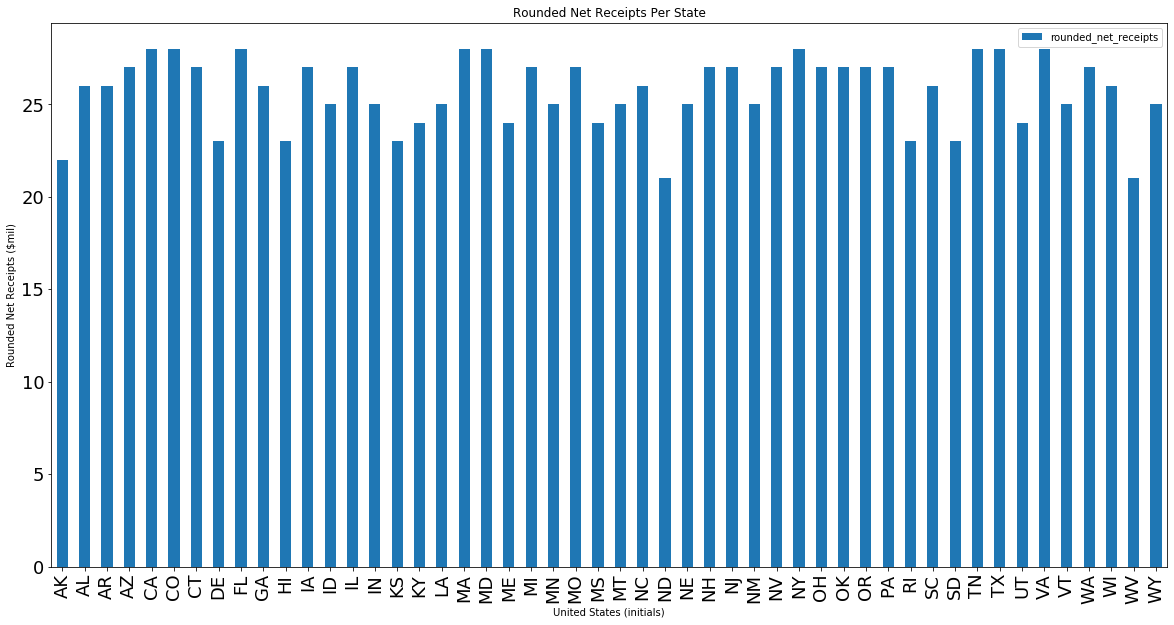

In [20]:
# Use groupby function to group the contributor states and the count function to count the rounded net receipts
states_receipts = states_df.groupby("contributor_state").count()["rounded_net_receipts"]

# Create a new df for the bar plot
pyplot_bar_United_States = pd.DataFrame(states_receipts)

# Create bar plot using plot function and establishing bar. Widen plot. Increase font size for easier viewing.
# Label x and y-axis. Give plot a title and export the visual
also = pyplot_bar_United_States.plot(kind='bar', stacked=True, figsize=(20,10), fontsize=18)
also
plt.xlabel("United States (initials)")
plt.ylabel("Rounded Net Receipts ($mil)")
plt.title("Rounded Net Receipts Per State")
plt.savefig("output/pyplot_bar_United_States")


The bar plot above shows the the total amount of money contributed to both Clinton and Trump for use in their 2016 presidential bid. Each bar represents one of the fifty U.S. states and the total amount of money coming from individuals and institutions from the state in question. I hypothesized that a state's tax revenue per capita has a positive correlation to the amount of financial support coming from that state to political candidates, but the bar plots I created show that this is not always true. For instance, according to the Tax Policy Center, Mississippi and Arkansas were towards the bottom of the list when it came to the amount of tax revenue it was getting per capita. Respectively, the figures were \\$3,609 and \\$3,955 during 2016. However, in total, they contributed a noteworthy amount of money to Clinton and Trump: respectively, ~\\$23mil and ~\\$27mil. North Dakota, on the other hand, donated ~\\$22mil, in total, to both candidates. Considering the state's tax revenue per capita during the year of 2016 was \\$6,640, it is not as large of a dollar amount as I would expect to come from the state. Conversely, Conneticut and Minnesota were among the top tier when it came to tax revenue per capita in 2016. Respectively, the figures were \\$7,239 and \\$6,092. Their respective presidential contributions were ~\\$27 mil and ~\\$24 mil, which means another one of our union's less economically successful states, Lousiana, was just tailing them with an aproximate contribution of \\$24 mil. That is a substantial figure when considering the state only saw \\$3,894 of tax revenue per capita during the same year.

In [23]:
# Combine the presidential_votes_df and states_df
combined_df = pd.merge(presidential_votes_df,states_df, on=("contributor_state"))

# Show new df
combined_df

,year,state,contributor_state,candidate,candidatevotes,candidate_id,candidate_party,candidate_last_name,rounded_net_receipts
0,2016,Alabama,AL,"Trump, Donald J.",1318255,P00000001,None,All candidates,6.4
1,2016,Alabama,AL,"Trump, Donald J.",1318255,P00000003,REP,Republicans,4.2
2,2016,Alabama,AL,"Trump, Donald J.",1318255,P00000002,DEM,Democrats,2.2
3,2016,Alabama,AL,"Trump, Donald J.",1318255,P80001571,REP,Trump,2.0
4,2016,Alabama,AL,"Trump, Donald J.",1318255,P00003392,DEM,Clinton,1.9
...,...,...,...,...,...,...,...,...,...
8746,2016,Wyoming,WY,Over Vote,278,P80003379,REP,Gilmore,0.0
8747,2016,Wyoming,WY,Over Vote,278,P20003984,GRE,Stein,0.0
8748,2016,Wyoming,WY,Over Vote,278,P60022654,IND,McMullin,0.0
8749,2016,Wyoming,WY,Over Vote,278,P60009685,DEM,Lessig,0.0


In [26]:
# Use loc function to extract data pertaining to Clinton
total_clinton = combined_df.loc[combined_df['candidate']=="Clinton, Hillary"]

# show df
total_clinton

,year,state,contributor_state,candidate,candidatevotes,candidate_id,candidate_party,candidate_last_name,rounded_net_receipts
26,2016,Alabama,AL,"Clinton, Hillary",729547,P00000001,None,All candidates,6.4
27,2016,Alabama,AL,"Clinton, Hillary",729547,P00000003,REP,Republicans,4.2
28,2016,Alabama,AL,"Clinton, Hillary",729547,P00000002,DEM,Democrats,2.2
29,2016,Alabama,AL,"Clinton, Hillary",729547,P80001571,REP,Trump,2.0
30,2016,Alabama,AL,"Clinton, Hillary",729547,P00003392,DEM,Clinton,1.9
...,...,...,...,...,...,...,...,...,...
8596,2016,Wyoming,WY,"Clinton, Hillary",55973,P80003379,REP,Gilmore,0.0
8597,2016,Wyoming,WY,"Clinton, Hillary",55973,P20003984,GRE,Stein,0.0
8598,2016,Wyoming,WY,"Clinton, Hillary",55973,P60022654,IND,McMullin,0.0
8599,2016,Wyoming,WY,"Clinton, Hillary",55973,P60009685,DEM,Lessig,0.0


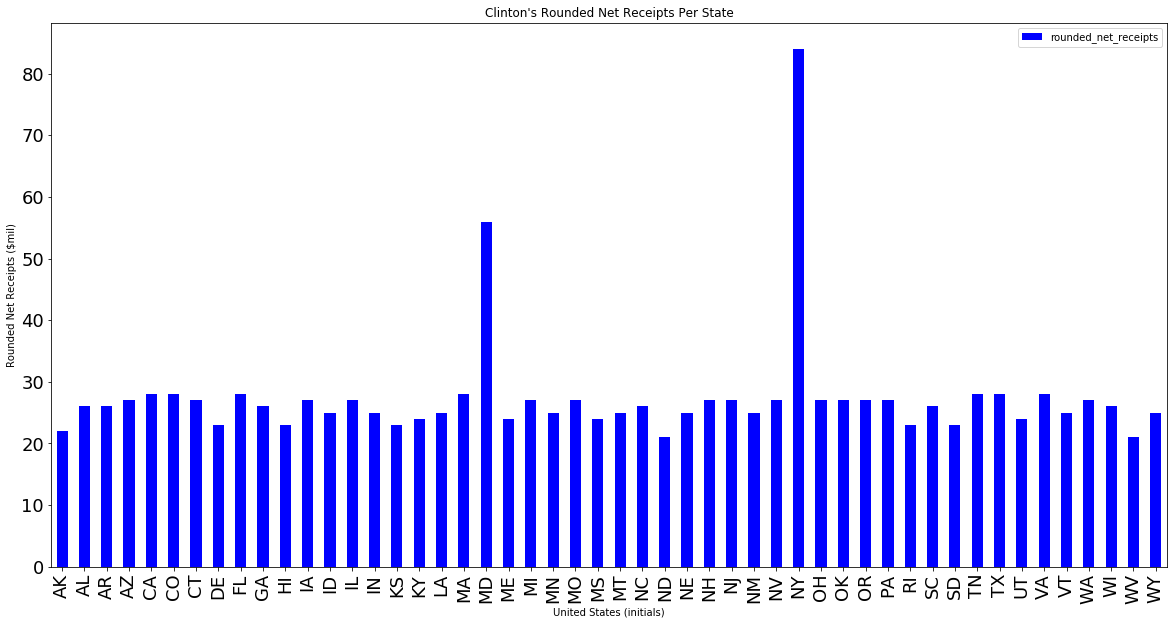

In [27]:
# Use group by function to group by contributor state and use count function to sum rounded net receipts
clinton_df = total_clinton.groupby("contributor_state").count()["rounded_net_receipts"]
# Create new df with the data derived from the code above
pyplot_bar_clinton = pd.DataFrame(clinton_df)

# Use plot function and specify bar to create a bar plot. Make visual wider, increase font size and make blue more vibrant
# Label x and y-axis. Give plot a title. Use savefig to export and save the visual
also = pyplot_bar_clinton.plot(kind='bar', stacked=True, figsize=(20,10), fontsize=18, color = "b")
also
plt.xlabel("United States (initials)")
plt.ylabel("Rounded Net Receipts ($mil)")
plt.title("Clinton's Rounded Net Receipts Per State")
plt.savefig("output/pyplot_bar_clinton_net_receipts_per_state")

This bar plot shows the amount of money contributed to Clinton, exclusively, during the 2016 presidential election. Here, I start to see some of what I had expected: a significant amount more money is coming out of two states on the wealthier end of the continuum. They are Maryland and New York, with respective tax revenue per capita during 2016 of \\$6,047 and \\$6,788. Why is the difference between Clinton's third largest contributor state, and her first and second largest so great? Many of Washington DC's affluent suburbs are located right over the border in Maryland and because of the urban sprawl boom, between 1992 and 2002, which saw the development of 2.2 million acres of land in the U.S., according to the National Resources Inventory, many coorporate institutions who are hyper concerned about the federal political arena set up shop in the mid atlantic state of Maryland. Thus it is enevitable for money to flow from Virginia's neiboring state. There are three primary reasons that a shocking amount of money came to Clinton from New York: the first being that she calls New York home, the second is she served the state as a U.S. senator from January 3, 2001 to January 21, 2009 and the third is because New York was home to the most fortune 500 compaies in 20016, with a count of 56.

In [30]:
# Use loc function to extract data pertaining to Trump
total_trump = combined_df.loc[combined_df['candidate']=="Trump, Donald J."]

# Show data 
total_trump

,year,state,contributor_state,candidate,candidatevotes,candidate_id,candidate_party,candidate_last_name,rounded_net_receipts
0,2016,Alabama,AL,"Trump, Donald J.",1318255,P00000001,None,All candidates,6.4
1,2016,Alabama,AL,"Trump, Donald J.",1318255,P00000003,REP,Republicans,4.2
2,2016,Alabama,AL,"Trump, Donald J.",1318255,P00000002,DEM,Democrats,2.2
3,2016,Alabama,AL,"Trump, Donald J.",1318255,P80001571,REP,Trump,2.0
4,2016,Alabama,AL,"Trump, Donald J.",1318255,P00003392,DEM,Clinton,1.9
...,...,...,...,...,...,...,...,...,...
8571,2016,Wyoming,WY,"Trump, Donald J.",174419,P80003379,REP,Gilmore,0.0
8572,2016,Wyoming,WY,"Trump, Donald J.",174419,P20003984,GRE,Stein,0.0
8573,2016,Wyoming,WY,"Trump, Donald J.",174419,P60022654,IND,McMullin,0.0
8574,2016,Wyoming,WY,"Trump, Donald J.",174419,P60009685,DEM,Lessig,0.0


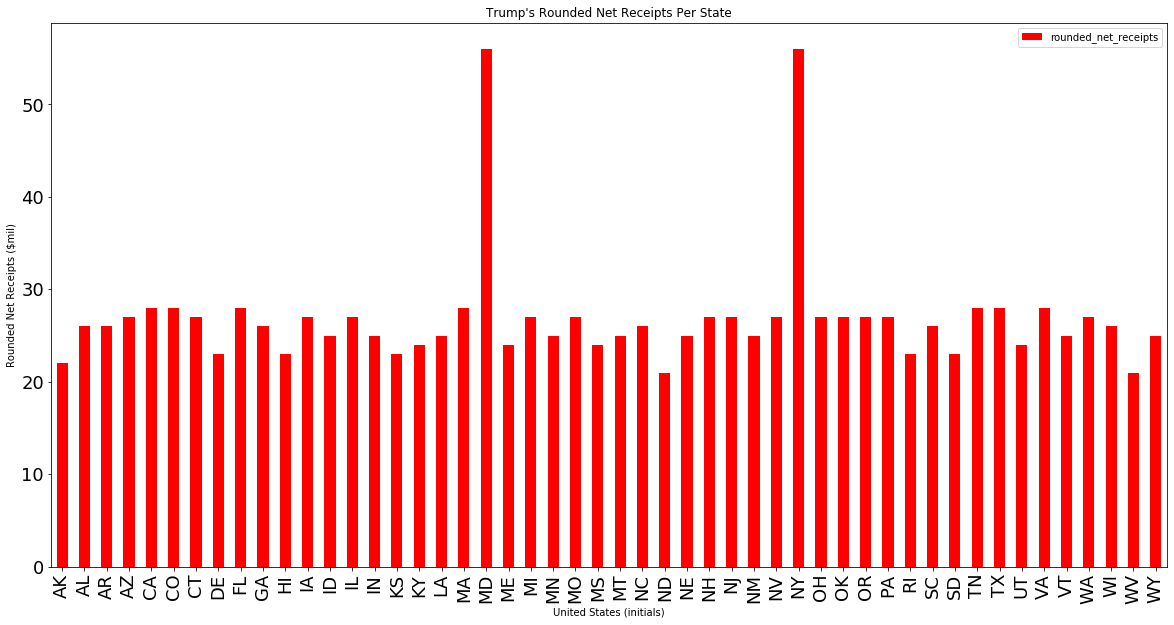

In [31]:
# Use groupby to groupby function contributor state and use count function to sum rounded net receipts 
trump_df = total_trump.groupby("contributor_state").count()["rounded_net_receipts"]
# Create a new df
pyplot_bar_trump = pd.DataFrame(trump_df)

# USe plot function and specify bar to create a bar plot. Increase width of visual. Inrease font and make bars vibrant red
# Label x and y-axis. Give plot a tite. Save and export file using savefig function
also = pyplot_bar_trump.plot(kind='bar', stacked=True, figsize=(20,10), fontsize=18, color = "r")
also
plt.xlabel("United States (initials)")
plt.ylabel("Rounded Net Receipts ($mil)")
plt.title("Trump's Rounded Net Receipts Per State")
plt.savefig("output/pyplot_bar_trump_net_receipts_per_state")

This plot is showing the amount of money contributed to Trump, by state, during the 2016 election. Once again, we see that Maryland donated a handsome sum of ~\\$57 mil and this is true for the same reasons Clinton saw so much money from the generous state. New York, home to the Trump empire, also donate ~\\$57mil, which is a far cry from the ~\\$87mil that Clinton got from the state she represented in the senate. Condisering New York is notoriously a blue state, it is no wonder why Trump could not raise as much money as Clinton from the third largest state, in respect to the electoral college.